<a href="https://colab.research.google.com/github/Geoffrey256/RAG_for_Stroke/blob/main/stroke_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Imports
import os
import string
from collections import Counter
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')      # this resolves your LookupError
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# @title Load and print the first five lines of each text file
corpus_dir = "/content/drive/MyDrive/Datasets/stroke_corpus"  # Adjust path as needed
files = [f for f in os.listdir(corpus_dir) if f.endswith(".txt")]

print(f"Found {len(files)} text files:\n", files)

# Read and print first 5 lines from each file
for file_name in sorted(files):
    file_path = os.path.join(corpus_dir, file_name)
    print(f"\nFile: {file_name}")
    print("-" * 50)
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= 5:
                break
            print(line.strip())

Found 8 text files:
 ['doc2.txt', 'doc1.txt', 'doc3.txt', 'doc4.txt', 'doc5.txt', 'doc6.txt', 'doc7.txt', 'doc8.txt']

File: doc1.txt
--------------------------------------------------
THE ATLAS OF
HEART DISEASE
AND STROKE
DR JUDITH MACKAY AND DR GEORGE A. MENSAH
Published by the WORLD HEALTH ORGANIZATION

File: doc2.txt
--------------------------------------------------
Caspases as Treatment Targets in Stroke and
Neurodegenerative Diseases
Jo¨rg B. Schulz, MD,* Michael Weller, MD,* and Michael A. Moskowitz, MD†
Apoptosis is one of the most exciting and intensely investigated areas of biology and medicine today. Cysteine proteases
called caspases serve as the executioners of apoptosis, a form of cell suicide. Hypoxic/ischemic cell death proceeds in part,

File: doc3.txt
--------------------------------------------------
Framework  for
the care of
acute coronary syndrome
and stroke
Framework  for

File: doc4.txt
--------------------------------------------------
History of Stroke
Histor

In [7]:
# @title Statistic for each text file and General Summary

total_lines = 0
total_words = 0
total_chars = 0

for file in files:
    path = os.path.join(corpus_dir, file)
    with open(path, 'r', encoding='utf-8') as f:
        text = f.read()

    lines = text.splitlines()
    words = text.split()
    num_chars = len(text)

    total_lines += len(lines)
    total_words += len(words)
    total_chars += num_chars

    print(f"\n{file}")
    print(f"- Lines: {len(lines)}")
    print(f"- Words: {len(words)}")
    print(f"- Characters: {num_chars}")

# Print overall totals
print("\n General Summary:")
print(f"- Total Lines: {total_lines}")
print(f"- Total Words: {total_words}")
print(f"- Total Characters: {total_chars}")



doc2.txt
- Lines: 1055
- Words: 7323
- Characters: 51335

doc1.txt
- Lines: 7301
- Words: 28353
- Characters: 189420

doc3.txt
- Lines: 2527
- Words: 21418
- Characters: 153528

doc4.txt
- Lines: 6385
- Words: 57128
- Characters: 388876

doc5.txt
- Lines: 1697
- Words: 17971
- Characters: 124902

doc6.txt
- Lines: 2240
- Words: 13903
- Characters: 81961

doc7.txt
- Lines: 611
- Words: 3955
- Characters: 27786

doc8.txt
- Lines: 5904
- Words: 24182
- Characters: 163960

 General Summary:
- Total Lines: 27720
- Total Words: 174233
- Total Characters: 1181768


In [19]:
# @title Tokenize and remove stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
import string
import os

# Load stopword list
stop_words = set(stopwords.words('english'))

# Read and tokenize entire corpus
full_text = ""
for file in files:
    with open(os.path.join(corpus_dir, file), 'r', encoding='utf-8') as f:
        text = f.read().lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        full_text += text + " "

tokens = word_tokenize(full_text)

# Total tokens
total_tokens = len(tokens)

# Filter only stopwords from the corpus
stopword_tokens = [word for word in tokens if word in stop_words]

# Count frequency of stopwords in corpus
stopword_freq = Counter(stopword_tokens)

# Print stats
print(f"Total Tokens in Corpus: {total_tokens}")
print(f"Total Stopwords in Corpus: {len(stopword_tokens)}\n")

# Print top 20 stopwords found in corpus
print("Top 20 Stopwords in the Corpus:")
for word, freq in stopword_freq.most_common(20):
    print(f"{word}: {freq}")


Total Tokens in Corpus: 173821
Total Stopwords in Corpus: 52921

Top 20 Stopwords in the Corpus:
the: 7591
of: 6391
and: 5330
in: 3714
to: 2849
a: 2758
for: 1600
with: 1232
is: 1191
by: 903
or: 868
as: 802
on: 792
that: 785
from: 698
are: 673
be: 608
this: 532
was: 506
an: 499


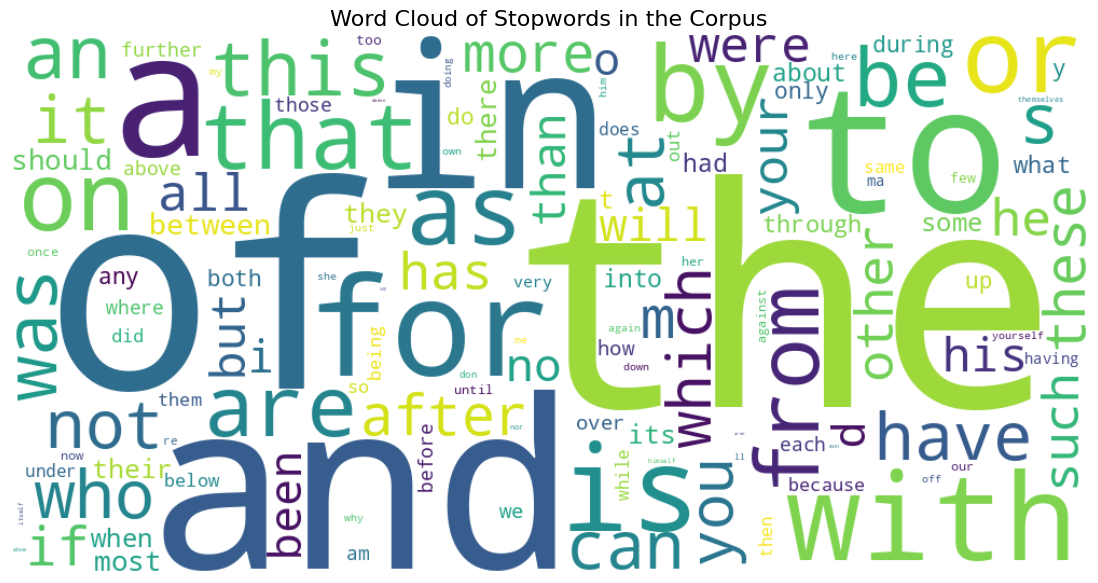

In [20]:
# @title Visualize stopwords using WordCloud
stopword_cloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(stopword_freq)

plt.figure(figsize=(15, 7))
plt.imshow(stopword_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Stopwords in the Corpus", fontsize=16)
plt.show()

In [21]:
# Remove stopwords (keep only alphabetic non-stop words)
non_stopword_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

print(f"Number of tokens after stopword removal: {len(non_stopword_tokens)}")


Number of tokens after stopword removal: 107016


In [22]:
# @title Nonstop Words
non_stopword_freq = Counter(non_stopword_tokens)
print("Top 20 Non-Stop Words:")
for word, freq in non_stopword_freq.most_common(20):
    print(f"{word}: {freq}")


Top 20 Non-Stop Words:
stroke: 2505
heart: 892
disease: 776
blood: 627
risk: 610
health: 569
care: 560
crossref: 557
j: 532
patients: 515
diabetes: 398
brain: 393
data: 349
may: 344
et: 331
cerebral: 315
study: 308
acute: 297
al: 296
ischemic: 275


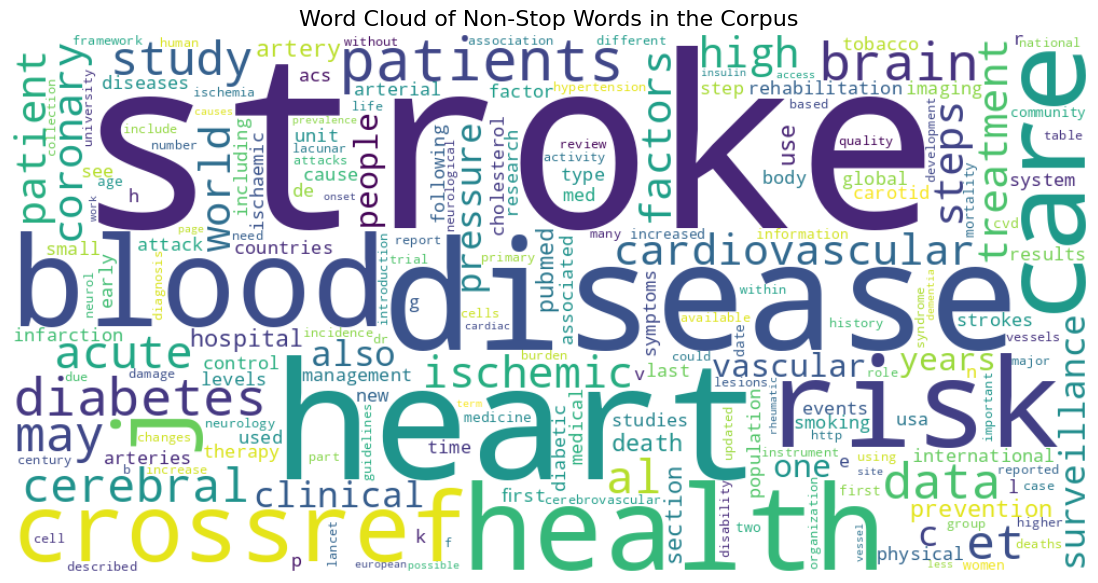

In [23]:
# title Visualize non-stop words
nonstop_cloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(non_stopword_freq)

plt.figure(figsize=(15, 7))
plt.imshow(nonstop_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Non-Stop Words in the Corpus", fontsize=16)
plt.show()

In [25]:
# @title Sample some lines of the corpus
# Join non-stopword tokens into a single string
non_stopword_text = " ".join(non_stopword_tokens)

# Split into chunks of N words per line (e.g., 20)
n = 20
lines = [' '.join(non_stopword_tokens[i:i + n]) for i in range(0, len(non_stopword_tokens), n)]

# Print the first 5 lines
print("\nText Sample from Non-Stopword Corpus:\n")
for i, line in enumerate(lines[:10], 1):
    print(f"Line {i}: {line}")



Text Sample from Non-Stopword Corpus:

Line 1: caspases treatment targets stroke neurodegenerative diseases b schulz md michael weller md michael moskowitz apoptosis one exciting intensely investigated areas
Line 2: biology medicine today cysteine proteases called caspases serve executioners apoptosis form cell suicide hypoxicischemic cell death proceeds part apoptosis particularly
Line 3: within periinfarct zone ischemic penumbra ischemia activated caspases dis mantle cell cleaving multiple substrates including cytoskeletal proteins enzymes essential cell
Line 4: repair strategies inhibit caspase activity block cell death experimental models mild ischemia preserve neurolog ical function therapeutic window caspase inhibition
Line 5: substantially longer glutamate receptor antag onists treatment combinations classes drugs decrease ischemic injury expand treatment window synergistically hence caspases recognized
Line 6: novel therapeutic targets central nervous system diseases cell deat

In [31]:
# @title Bigrams
from nltk import bigrams
import matplotlib.pyplot as plt

# Generate bigrams
bigram_list = list(bigrams(non_stopword_tokens))
bigram_freq = Counter(bigram_list)
top_20_bigrams = bigram_freq.most_common(20)

# Print top 20
print("Top 20 Bigrams:")
for pair, freq in top_20_bigrams:
    print(f"{' '.join(pair)}: {freq}")


Top 20 Bigrams:
heart disease: 287
et al: 283
blood pressure: 212
risk factors: 203
crossref pubmed: 186
steps stroke: 185
stroke surveillance: 165
ischemic stroke: 160
high blood: 122
coronary heart: 120
world health: 109
cardiovascular disease: 107
heart attacks: 89
heart attack: 89
stroke patients: 88
acs stroke: 84
health care: 83
risk factor: 81
v date: 81
date last: 81


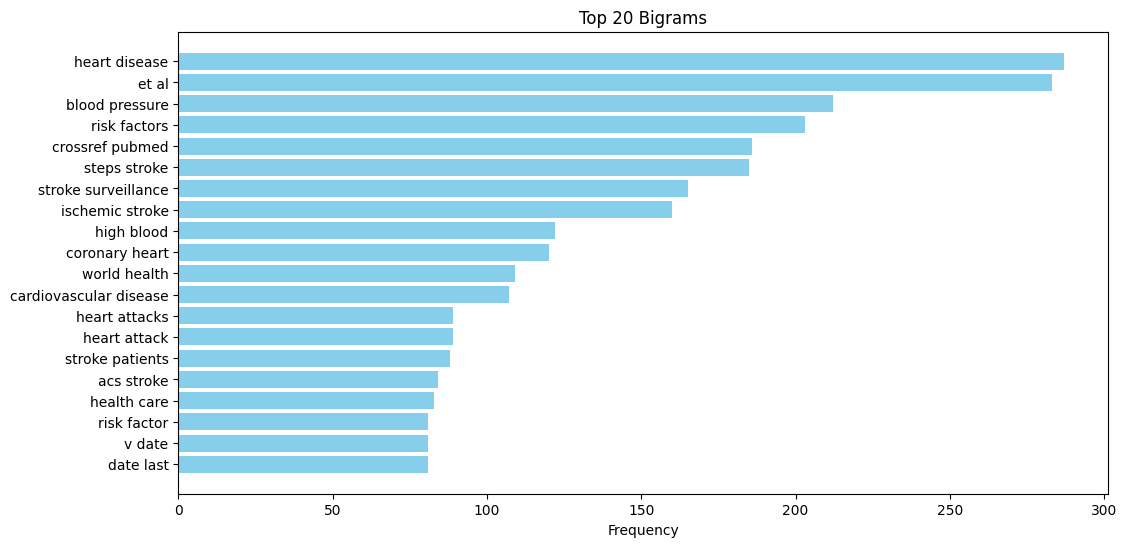

In [32]:
# Bar plot
labels, values = zip(*[(' '.join(b), f) for b, f in top_20_bigrams])
plt.figure(figsize=(12, 6))
plt.barh(labels, values, color='skyblue')
plt.title("Top 20 Bigrams")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.show()

In [33]:
# @title Trigrams
from nltk import trigrams

# Generate trigrams
trigram_list = list(trigrams(non_stopword_tokens))

# Count frequencies
trigram_freq = Counter(trigram_list)
top_20_trigrams = trigram_freq.most_common(20)

# Print top 20
print("Top 20 Trigrams:")
for trio, freq in top_20_trigrams:
    print(f"{' '.join(trio)}: {freq}")


Top 20 Trigrams:
coronary heart disease: 117
steps stroke surveillance: 112
high blood pressure: 87
v date last: 81
date last updated: 81
last updated may: 81
updated may steps: 81
may steps stroke: 72
world health organization: 70
heart attacks strokes: 68
heart disease stroke: 67
n engl j: 44
engl j med: 44
j med crossref: 42
rheumatic heart disease: 41
acute coronary syndrome: 38
care acs stroke: 38
continued next page: 33
next page section: 32
int j mol: 31


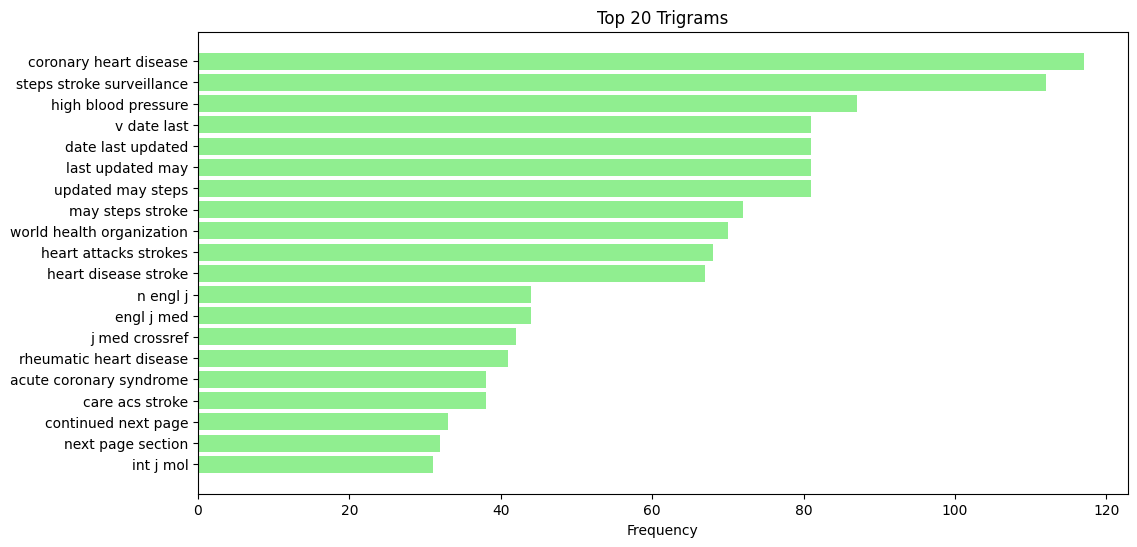

In [37]:
# Bar plot
labels, values = zip(*[(' '.join(t), f) for t, f in top_20_trigrams])
plt.figure(figsize=(12, 6))
plt.barh(labels, values, color='lightgreen')
plt.title("Top 20 Trigrams")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.show()

In [38]:
# @title Fourgrams
from nltk.util import ngrams

# Generate 4-grams
fourgram_list = list(ngrams(non_stopword_tokens, 4))

# Count frequencies
fourgram_freq = Counter(fourgram_list)
top_20_fourgrams = fourgram_freq.most_common(20)

# Print top 20
print("Top 20 Fourgrams:")
for quad, freq in top_20_fourgrams:
    print(f"{' '.join(quad)}: {freq}")

Top 20 Fourgrams:
v date last updated: 81
date last updated may: 81
last updated may steps: 81
updated may steps stroke: 72
may steps stroke surveillance: 72
n engl j med: 44
engl j med crossref: 41
continued next page section: 32
int j mol sci: 31
acute coronary syndrome stroke: 28
framework care acute coronary: 27
care acute coronary syndrome: 27
section data collection guidelines: 25
risk heart attacks strokes: 22
data collection guidelines v: 22
collection guidelines v date: 22
guidelines v date last: 22
noncommunicable diseases mental health: 20
geneva world health organization: 19
stroke n engl j: 18


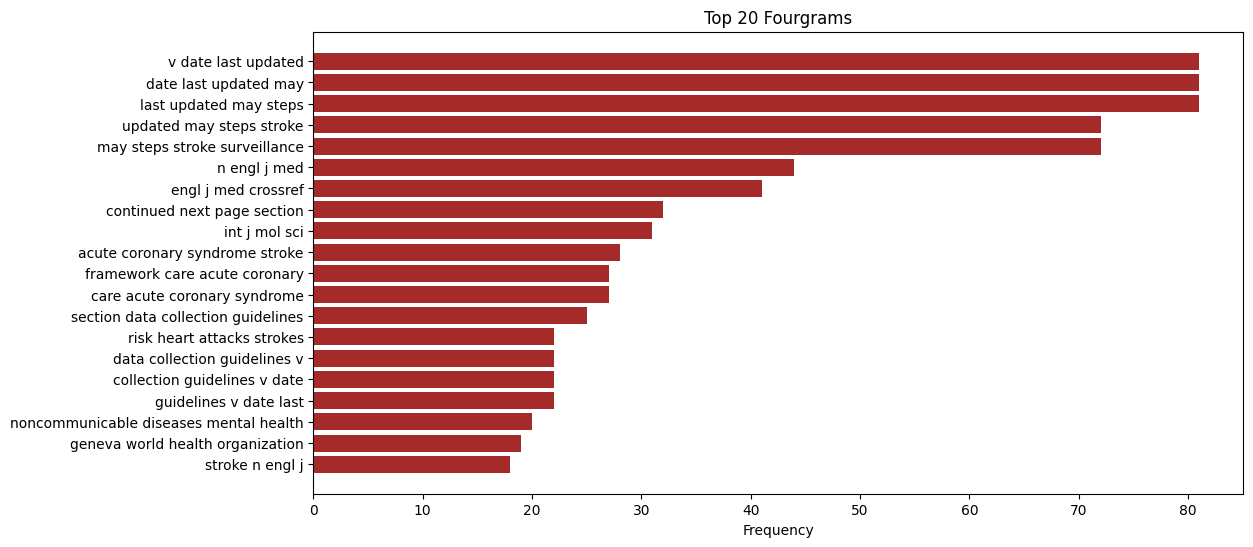

In [46]:
# Bar plot
labels, values = zip(*[(' '.join(q), f) for q, f in top_20_fourgrams])
plt.figure(figsize=(12, 6))
plt.barh(labels, values, color='brown')
plt.title("Top 20 Fourgrams")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()
plt.show()


**Sentiment Analysis**

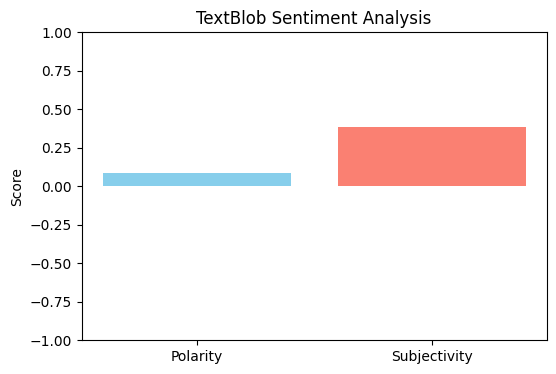

Polarity: 0.08905187941816253, Subjectivity: 0.3859822330277619


In [42]:
# @title TextBlob Sentiment Analysis
from textblob import TextBlob
import matplotlib.pyplot as plt

# Combine tokens into text
text = ' '.join(non_stopword_tokens)

# Sentiment analysis
blob = TextBlob(text)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

# Visualization
plt.figure(figsize=(6, 4))
plt.bar(['Polarity', 'Subjectivity'], [polarity, subjectivity], color=['skyblue', 'salmon'])
plt.ylim(-1, 1)
plt.title("TextBlob Sentiment Analysis")
plt.ylabel("Score")
plt.show()

print(f"Polarity: {polarity}, Subjectivity: {subjectivity}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


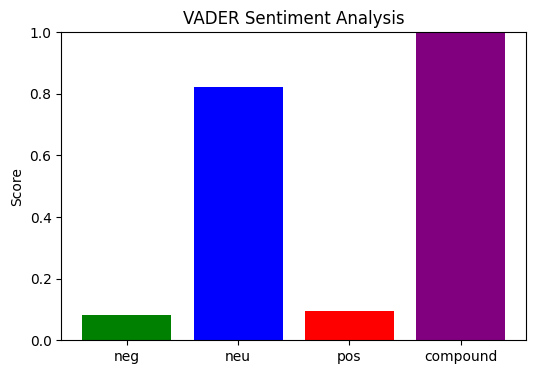

{'neg': 0.083, 'neu': 0.822, 'pos': 0.095, 'compound': 1.0}


In [43]:
# @title VADER Sentiment Analysis and Visualization
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

# VADER analyzer
sia = SentimentIntensityAnalyzer()
vader_scores = sia.polarity_scores(text)

# Visualization
labels = list(vader_scores.keys())
scores = list(vader_scores.values())

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['green', 'blue', 'red', 'purple'])
plt.title("VADER Sentiment Analysis")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

print(vader_scores)


In [ ]:
# @title Transformers-Based Sentiment
from transformers import pipeline
import matplotlib.pyplot as plt

# Load sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Run sentiment
result = sentiment_pipeline(text)[0]
label = result['label']
score = result['score']

# Visualization
plt.figure(figsize=(4, 4))
plt.bar([label], [score], color='orange')
plt.ylim(0, 1)
plt.title("Transformer Sentiment Analysis")
plt.ylabel("Confidence Score")
plt.show()

print(f"Label: {label}, Confidence: {score}")


/tmp/ipython-input-40-2080478348.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bigrams, x='Frequency', y='Bigram', palette='Blues_d')


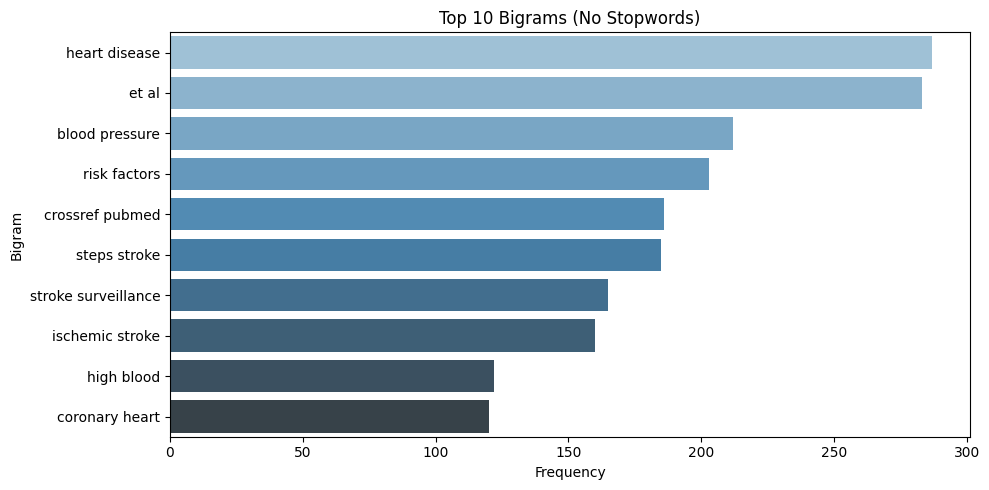

In [ ]:
# @title Bar Plot for Top Bigrams
import seaborn as sns
import pandas as pd

# Prepare top bigrams for plotting
top_bigrams = bigram_freq.most_common(10)
df_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
df_bigrams['Bigram'] = df_bigrams['Bigram'].apply(lambda x: ' '.join(x))

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_bigrams, x='Frequency', y='Bigram', palette='Blues_d')
plt.title('Top 10 Bigrams (No Stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()


/tmp/ipython-input-41-1588169900.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_trigrams, x='Frequency', y='Trigram', palette='Greens_d')


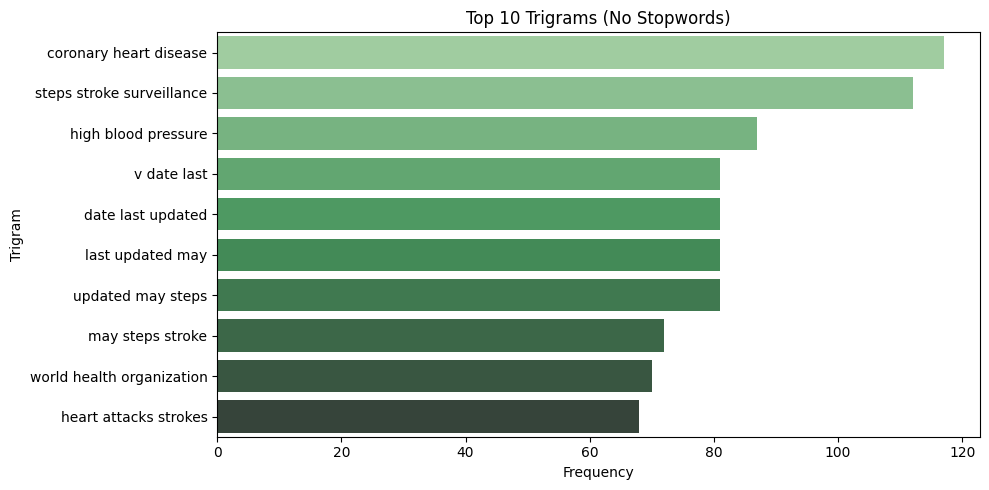

In [ ]:
# @title Bar Plot for Top Trigrams
# Prepare top trigrams for plotting
top_trigrams = trigram_freq.most_common(10)
df_trigrams = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])
df_trigrams['Trigram'] = df_trigrams['Trigram'].apply(lambda x: ' '.join(x))

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_trigrams, x='Frequency', y='Trigram', palette='Greens_d')
plt.title('Top 10 Trigrams (No Stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.tight_layout()
plt.show()


/tmp/ipython-input-42-2543486063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_fourgrams, x='Frequency', y='Fourgram', palette='Reds_d')


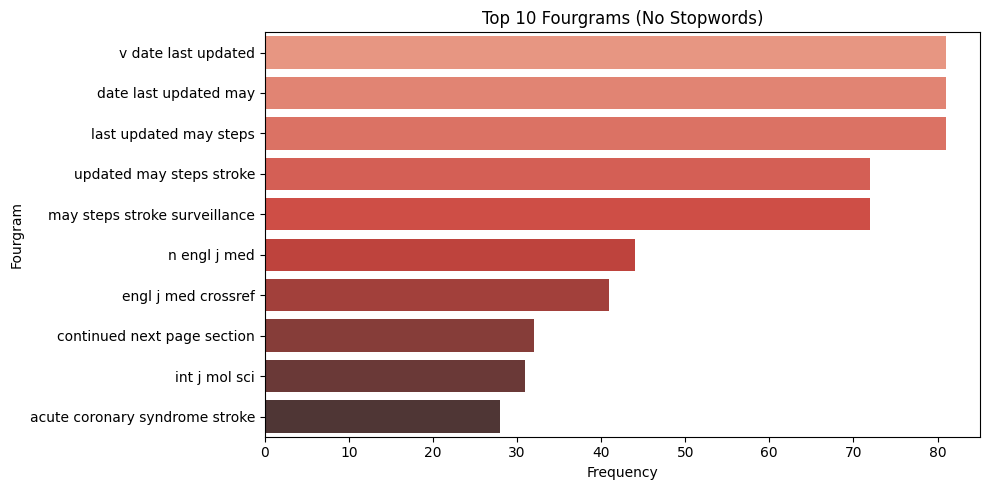

In [ ]:
# @title Bar Plot for Top Fourgrams
top_fourgrams = fourgram_freq.most_common(10)
df_fourgrams = pd.DataFrame(top_fourgrams, columns=['Fourgram', 'Frequency'])
df_fourgrams['Fourgram'] = df_fourgrams['Fourgram'].apply(lambda x: ' '.join(x))

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_fourgrams, x='Frequency', y='Fourgram', palette='Reds_d')
plt.title('Top 10 Fourgrams (No Stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Fourgram')
plt.tight_layout()
plt.show()
